# Simple linear regression task

First we import some libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

Now, we consider a simple data which we want to learn

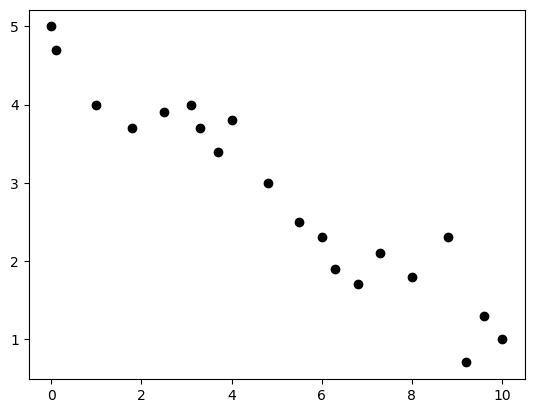

In [2]:
x = np.array([0, 0.1, 1, 1.8, 2.5, 3.1, 3.3, 3.7, 4, 4.8, 5.5, 6, 6.3, 6.8, 7.3, 8, 8.8, 9.2, 9.6, 10])
y = np.array([5, 4.7, 4, 3.7, 3.9, 4, 3.7, 3.4, 3.8, 3, 2.5, 2.3, 1.9, 1.7, 2.1, 1.8, 2.3, 0.7, 1.3, 1])

plt.plot(x, y,'o',color='k')
plt.show()

Let us define the activation function.

In [3]:
def activation(x, w, b):
    return w*x+b

And so on we define the cost functional

In [4]:
def compute_cost(x, y, w, b):
    """
    Computes the cost for f(x)=w*x+b when w and b are scalars
    Args:
      x (ndarray (m,)): data (vector) , m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      sum(yhat-y)**2    
     """
    
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        yhat = activation(x[i],w,b)
        cost = cost + (yhat - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

We will need the gradient of the cost functional in order to apply the gradient descent algorithm

In [5]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for f(x)=w*x+b when w and b are scalars
    Args:
      x (ndarray (m,)): data (vector) , m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dJ_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dJ_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dJ_dw = 0
    dJ_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dJ_dw_i = (f_wb - y[i]) * x[i] 
        dJ_db_i = f_wb - y[i] 
        dJ_db += dJ_db_i
        dJ_dw += dJ_dw_i 
        
    dJ_dw = dJ_dw / m 
    dJ_db = dJ_db / m 
        
    return dJ_dw, dJ_db

In [6]:
def gradient_descent(x, y, w0, b0, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w0) # avoid modifying global w_in
    # An empty vector to store cost J and w's at each iteration primarily for graphing later
    J_history = []

    b = b0
    w = w0
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}")
 
    return w, b, J_history #return w and J,w history for graphing

Now, we are in good position to make some regression. First we give some initial values

In [7]:
# initialize parameters
w0 = 0
b0 = 0
# some gradient descent settings
iterations = 2000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist = gradient_descent(x ,y, w0, b0, tmp_alpha,iterations, compute_cost, compute_gradient)


Iteration    0: Cost 3.73e+00
Iteration  200: Cost 1.10e+00
Iteration  400: Cost 4.26e-01
Iteration  600: Cost 1.91e-01
Iteration  800: Cost 1.08e-01
Iteration 1000: Cost 7.91e-02
Iteration 1200: Cost 6.89e-02
Iteration 1400: Cost 6.54e-02
Iteration 1600: Cost 6.42e-02
Iteration 1800: Cost 6.37e-02


We got our optimal $(w,b)$, now let us draw the line $y=w*x+b$

In [8]:
xx = np.linspace(0,11,1000)
yy = w_final*xx+b_final

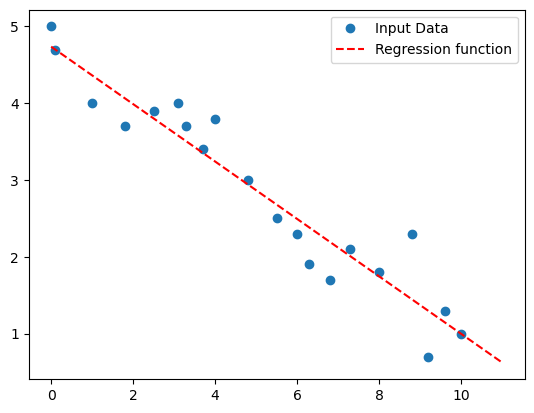

In [9]:
plt.plot(x, y, 'o', xx, yy, 'r--') 
plt.legend(['Input Data', 'Regression function'])
plt.show()

Also we can plot the cost with respect to number of iteration

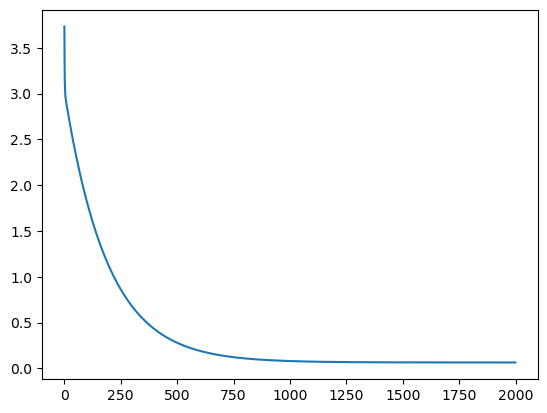

In [10]:
plt.plot(J_hist)
plt.show()

# Congrats
You have learn how to make some regression!